<a href="https://colab.research.google.com/github/mariaeco/imersao-dados-desafio-final/blob/main/Sele%C3%A7%C3%A3o_de_Vari%C3%A1veis_e_Compostos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PROJETO IMERSÃO ALURA

Esse projeto foi inspirado em um desafio do Laboratory innovation science at Harvard disponibilizando os dados em uma competição no Kaggle.

**Perguntas Iniciais:**

1) Quais compostos tiveram algum efeito na ativação dos genes? Se o composto não teve efeito, não continuar a análise com ele. (Não significa que não ter efeito não é importante, se um composto for ruim, então é bom que ele não tenha efeito)

2) Se apresentaram efeito, quais apresentaram efeito positivo sobre a ativação do gene e quais apresentaram efeito negativo?

3) Qual o mecanismo de ação (banco de dados 2) principal para o efeito sobre o gene?

**Importante**
A quantidade de genes e compostos é enorme. Como trabalhar com isso? Selecionar o que vamos trabalhar? Então saber se o composto não teve efeito já é uma eliminação de variáveis. Mas as vezes um composto tem efeito sobre um gene ou grupo de genes e sobre outros não. Como tratar isso?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Planilha dos Experimentos e Resultados

In [222]:
dados_exp = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')
dados_exp.columns = dados_exp.columns.str.replace('-', '')
dados_exp.rename(columns={'droga': 'composto'}, inplace=True)

In [ ]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

### Merge

In [234]:
dados = pd.merge(dados_exp, dados_resultados, on='id')
#renomeando pra ficar mais bonito
dados.sort_values(['tratamento', 'composto', 'dose'], inplace=True)
dados['composto'] = dados['composto'].replace({'cacb2b860': 'Controle'})
dados['tratamento'] = dados['tratamento'].replace({'com_controle': 'Controle','com_droga': 'Tratamento' })
dados


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
25,id_0054388ec,Controle,48,D1,Controle,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,id_0079af0fb,Controle,24,D1,Controle,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,id_00d575cfb,Controle,72,D1,Controle,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,id_01b05de6c,Controle,48,D1,Controle,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175,id_01f1c58a2,Controle,72,D1,Controle,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22773,id_f48c19472,Tratamento,72,D1,fff7d208d,0.5408,-1.4560,-0.1473,0.4003,0.2285,0.3690,1.1740,-0.5140,-1.0500,-0.4816,0.4252,-0.7625,1.5500,1.2170,0.3908,-1.3730,0.5137,0.4466,1.1670,0.2632,0.1771,-0.3740,0.8383,-2.0820,-0.3954,1.4400,0.4031,0.3557,0.9868,0.7782,0.4559,-0.1629,0.2494,-0.1824,0.5438,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23637,id_fdf860f5f,Tratamento,24,D1,fff7d208d,0.3602,0.1099,-0.2263,0.3325,0.6581,-0.6463,0.1821,-0.4568,-0.3015,0.0829,-0.3963,-0.1849,1.0660,0.8443,0.7604,-0.5483,0.0097,0.5490,0.3318,0.0000,-1.1260,-1.3260,0.6020,-1.0270,-0.7888,0.8839,-0.09

## Escolhendo qual subconjunto de dados trabalhar
* Escolhendo os compostos que vamos trabalhar com base no principio ativo, o principio ativo que tenha mais compostos

In [235]:
dados.drop(['id', 'tempo'], axis=1).select_dtypes('int64').sum(axis=0).sort_values(ascending=False)

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Com base no resultado acima ficou notável que o princípio ativo ```nfkb``` foi o que apresentou a maior quantidade de compostos

In [320]:
sub_data = dados.query('nfkb_inhibitor > 0 | tratamento == "Controle"')
sub_data
# é o mesmo que dados[(dados['nfkb_inhibitor'] > 0) | (dados['tratamento']=='com_controle')]

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
25,id_0054388ec,Controle,48,D1,Controle,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,id_0079af0fb,Controle,24,D1,Controle,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,id_00d575cfb,Controle,72,D1,Controle,-0.6723,-0.1206,0.3467,-0.6395,-0.3117,1.2260,0.5376,0.4072,0.1072,0.2999,-0.5951,0.3314,-0.6563,-0.5825,-0.3253,-0.2861,1.8600,-0.2175,0.0644,-0.8179,0.5433,1.2210,-0.3418,0.0000,1.5970,0.3848,0.9079,-0.8118,-0.0735,-0.7087,0.3599,-0.2125,0.2554,0.1326,-1.0840,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,id_01b05de6c,Controle,48,D1,Controle,-0.3176,0.8375,-0.3773,0.5555,-0.4877,0.3413,-0.8204,-1.1320,1.0220,2.8340,1.5950,-0.4357,2.4850,0.0169,0.3497,0.2446,0.9030,1.0480,-0.0236,0.1287,-0.2542,-0.9599,-1.2090,0.8248,1.2270,0.9403,1.2220,0.7952,0.0654,0.1419,0.4826,-0.3608,-1.2470,0.8987,-1.6590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175,id_01f1c58a2,Controle,72,D1,Controle,1.1220,0.7841,-0.4374,-0.0314,-0.4130,0.5947,0.8534,0.0790,0.3800,-0.2035,0.2127,-0.4461,1.0430,0.2279,0.0566,0.0000,-0.3716,0.1550,0.3925,-0.0826,0.1344,1.5450,-0.3988,0.7190,0.6027,-0.7236,0.9727,-0.7076,0.7918,-0.4296,-0.6394,0.1831,0.5052,0.0070,-0.6597,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529,id_7178e42ef,Tratamento,24,D1,f60388237,0.2693,0.9886,0.1210,-0.4752,-0.3997,-1.7820,-1.0060,1.3100,-0.4478,1.4990,-1.2080,-1.7410,0.8301,-0.1715,-1.9990,0.0348,-0.7874,0.0087,0.1693,0.7240,-1.5570,-0.0800,-0.9423,-0.1714,-0.3942,-0.1990,0.5888,-1.3240,-0.7402,-0.2822,-0.2708,0.1447,0.5850,-0.4957,1.1590,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17096,id_b810ccd1c,Tratamento,48,D1,f60388237,-0.1013,0.1885,-0.1874,0.5962,-0.0206,-0.0087,-1.2070,0.8762,-0.5401,-1.1610,0.6889,0.0460,-0.5643,-0.6220,-0.7289,0.4890,-0.3350,0.4488,0.2506,-0.0421,-0.4553,0.1079,0.3494,0.0000,-0.3316,

In [238]:
len(sub_data.composto.unique()) # de sub_data reduzi para 19 sendo 1 o controle

20

In [239]:
sub_data.tratamento.value_counts()

Controle      1866
Tratamento     832
Name: tratamento, dtype: int64

#### EXPLORAÇÃO DOS DADOS


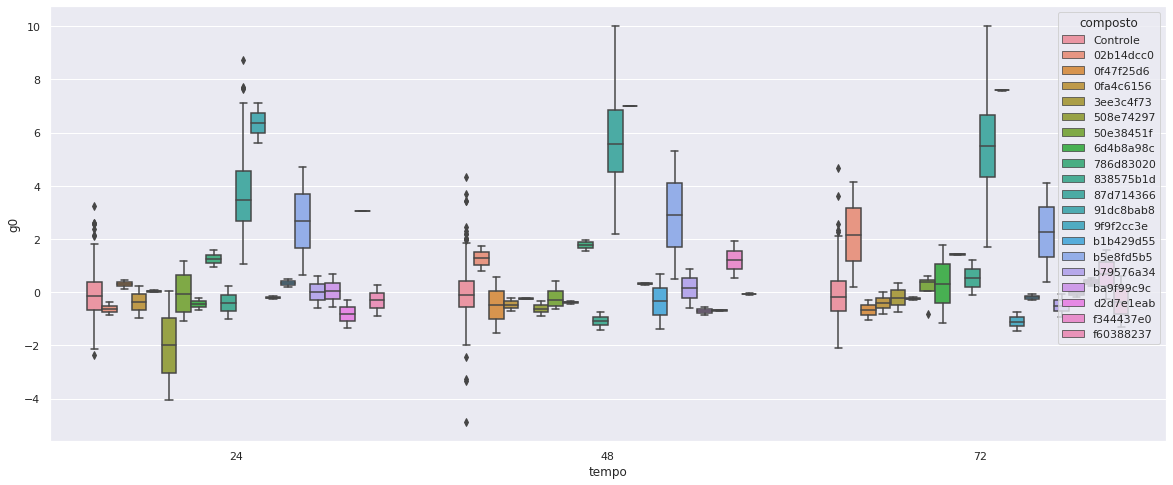

In [267]:
sns.set()
cod_compostos = sub_data.composto.value_counts().index[:8]
selected_compostos =sub_data.query('composto in @cod_compostos')
selected_compostos.head()

plt.figure(figsize=(20,8))
sns.boxplot(data=selected_compostos, x='tempo', y='g0', hue='composto')

In [303]:
sub_data['composto'].value_counts()

Controle     1866
87d714366     718
50e38451f      12
508e74297       7
9f9f2cc3e       6
0fa4c6156       6
3ee3c4f73       6
b1b429d55       6
ba9f99c9c       6
b79576a34       6
b5e8fd5b5       6
0f47f25d6       6
d2d7e1eab       6
6d4b8a98c       6
f60388237       6
91dc8bab8       6
02b14dcc0       6
838575b1d       6
786d83020       6
f344437e0       5
Name: composto, dtype: int64

In [319]:
sub_data.query('composto != "Controle"')['composto'].value_counts(normalize=True)*100

87d714366    86.298077
50e38451f     1.442308
508e74297     0.841346
02b14dcc0     0.721154
0f47f25d6     0.721154
6d4b8a98c     0.721154
f60388237     0.721154
ba9f99c9c     0.721154
b79576a34     0.721154
0fa4c6156     0.721154
838575b1d     0.721154
91dc8bab8     0.721154
d2d7e1eab     0.721154
b5e8fd5b5     0.721154
3ee3c4f73     0.721154
9f9f2cc3e     0.721154
b1b429d55     0.721154
786d83020     0.721154
f344437e0     0.600962
Name: composto, dtype: float64

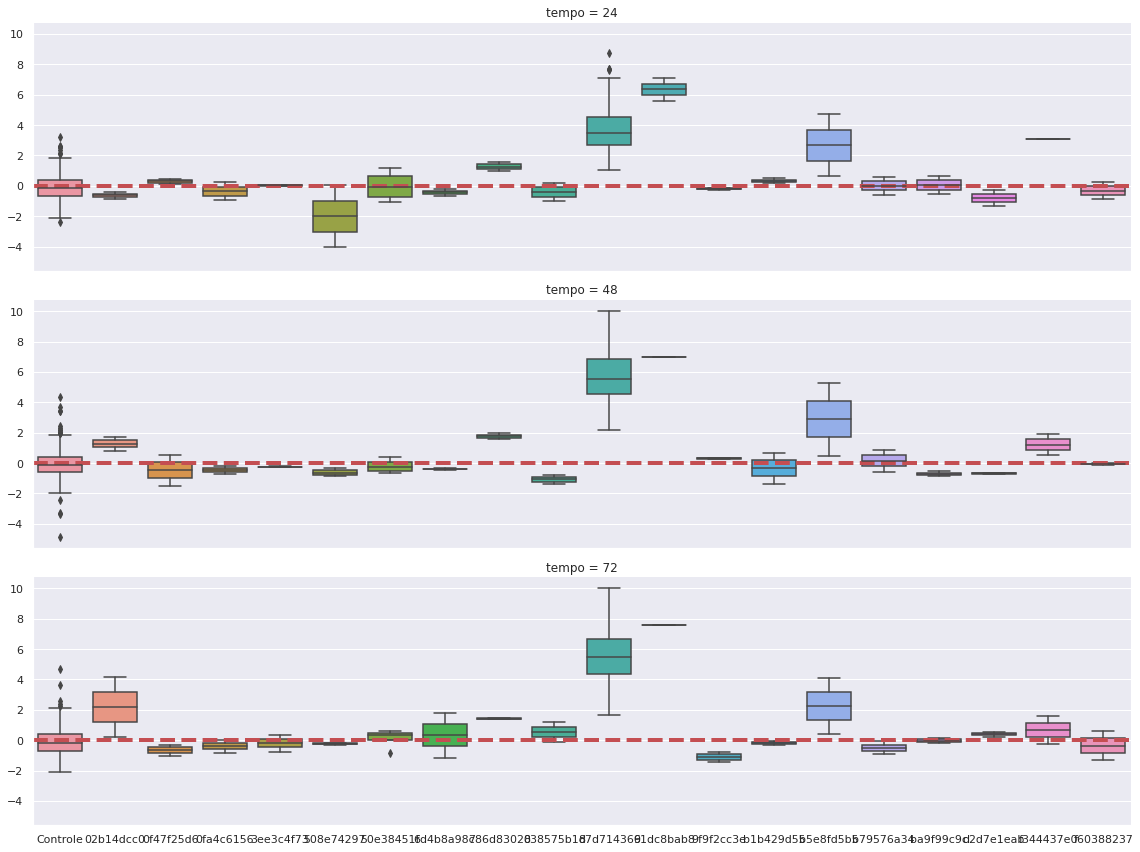

In [297]:
#@title
sns.set()
g = sns.catplot(x="composto", y="g0", #hue = dose
                col="tempo",col_wrap=1, 
                data=selected_compostos, kind="box",
                height=4, aspect=4);
g.map(plt.axhline, y=0, color = 'r', ls = '--', linewidth=4);


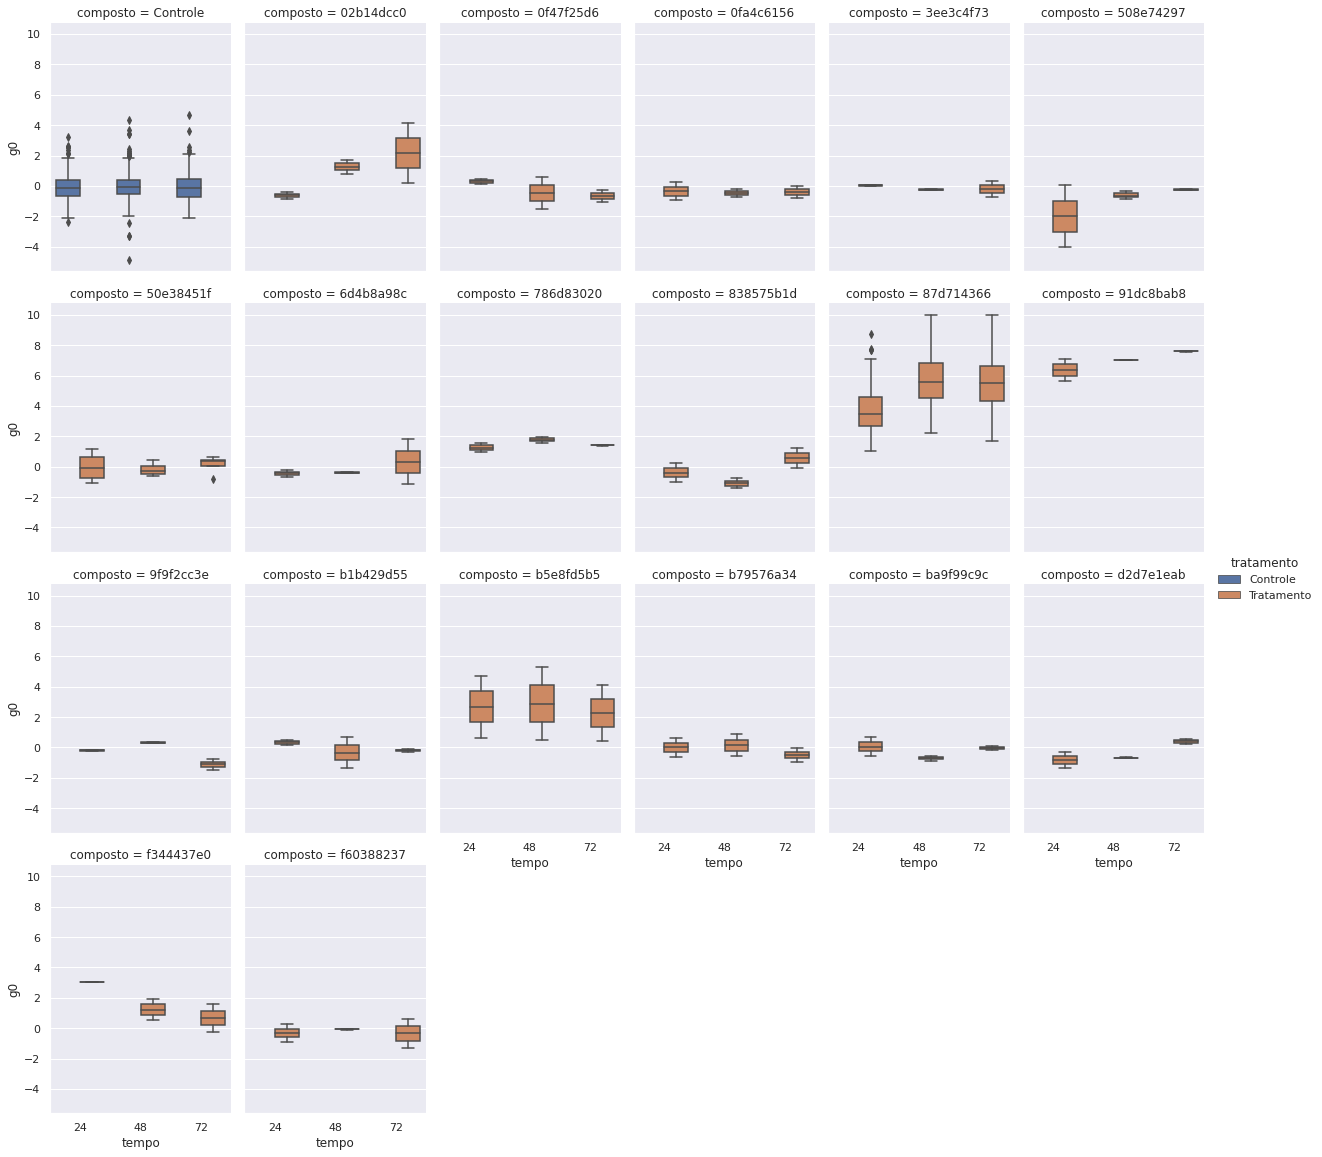

In [266]:
sns.set()
g = sns.catplot(x="tempo", y="g0",
                hue="tratamento",col="composto",col_wrap=6,
                data=selected_compostos, kind="box",
                height=4, aspect=.7);

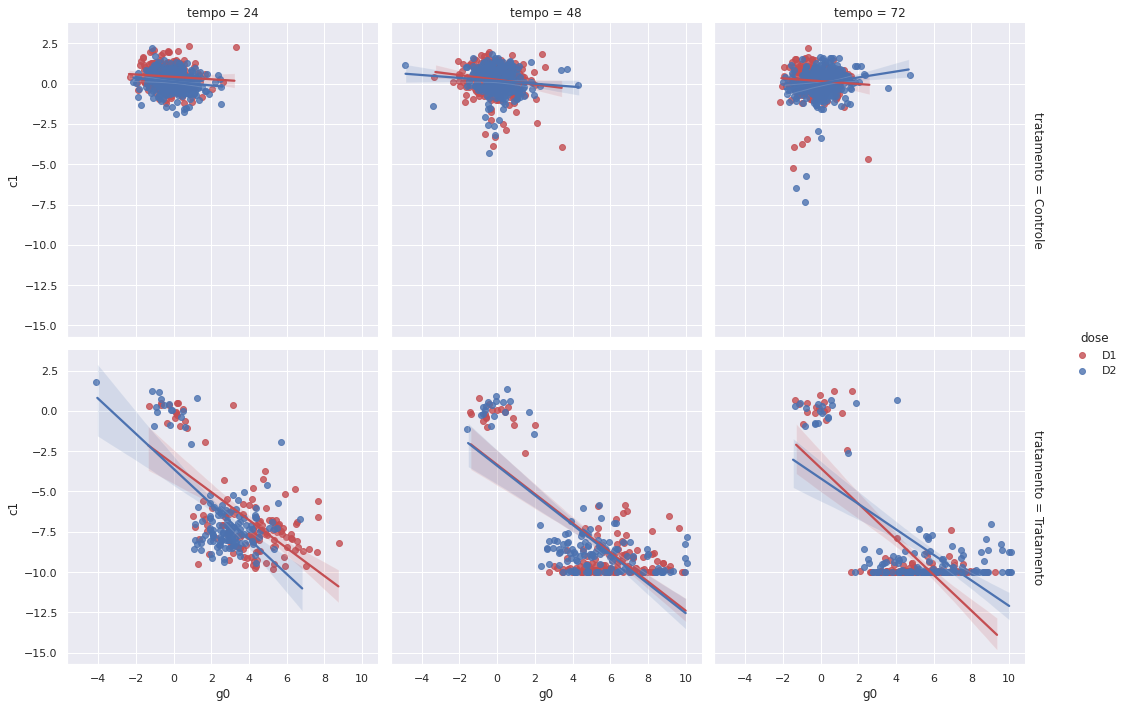

In [301]:
g = sns.FacetGrid(data=sub_data, row='tratamento', col='tempo', hue='dose', palette=dict(D1='r', D2='b'), margin_titles=True, height=5)
g.map(sns.regplot, 'g0', 'c1', fit_reg=True, x_jitter=.1)
g.add_legend();

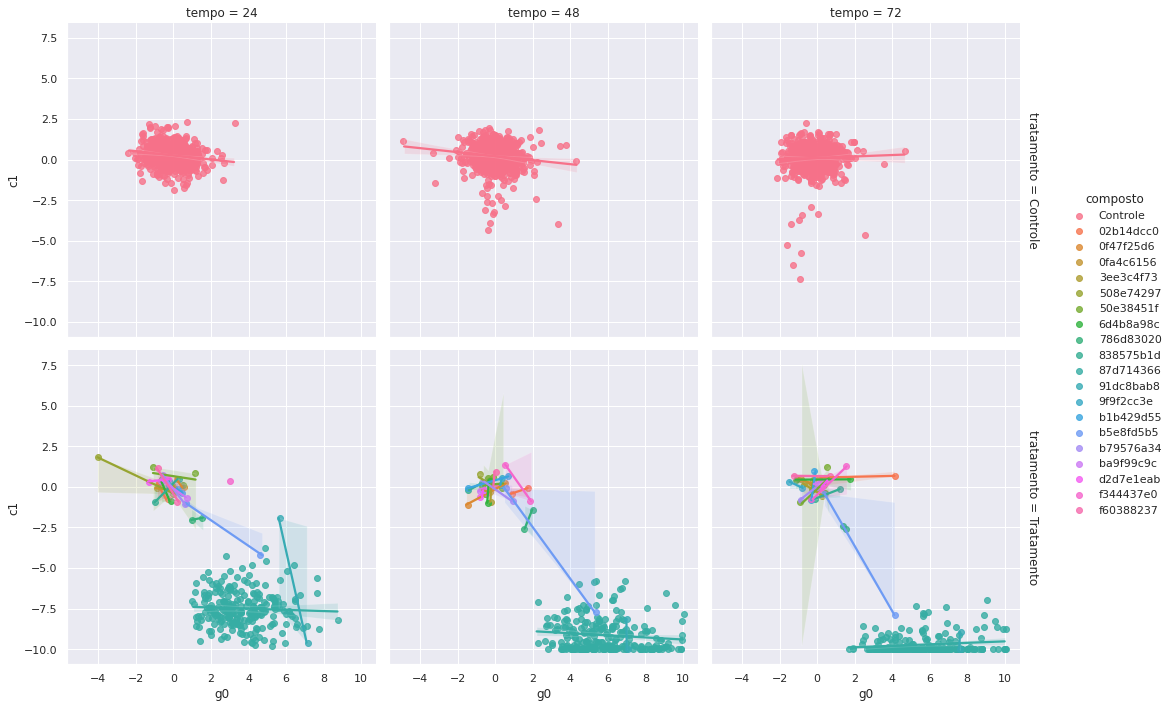

In [302]:
g = sns.FacetGrid(data=sub_data, row='tratamento', col='tempo', hue='composto',  margin_titles=True, height=5)
g.map(sns.regplot, 'g0', 'c1', fit_reg=True, x_jitter=.1)
g.add_legend();